In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [17]:
def get_results(selection,experiment_scenario):
    log_file_path = f'../Data/{selection}/{experiment_scenario}/Qlearning_Simulation_info.txt'


    # Read the log file
    with open(log_file_path, 'r') as file:
        log_content = file.read()

    # Regular expressions to find all occurrences of the required information and their values
    reward_pattern = re.compile(r'Episode Reward: ([-\d.]+)')
    avg_reward_pattern = re.compile(r'Episode Avg Reward : ([-\d.]+)')
    min_reward_pattern = re.compile(r'Episode Min Reward : ([-\d.]+)')
    step_pattern = re.compile(r'Episode Steps: (\d+)')
    ep_time_pattern = re.compile(r'Episode Time: ([-\d.]+)')

    # Find all matches in the log content
    rewards = [float(match) for match in reward_pattern.findall(log_content)]
    avg_rewards = [float(match) for match in avg_reward_pattern.findall(log_content)]
    min_rewards = [float(match) for match in min_reward_pattern.findall(log_content)]
    steps = [int(match) for match in step_pattern.findall(log_content)]
    ep_time=[float(match) for match in ep_time_pattern.findall(log_content)]

    # Create a DataFrame with the extracted information
    df = pd.DataFrame({
        'Episode': range(1, len(steps) + 1),
        'Steps': steps,
        'Episode Reward': rewards,
        'Episode Avg Reward': avg_rewards,
        'Episode Min Reward': min_rewards,
        'Episode Time': ep_time
    })
    result = {
        'avg_reward': df['Episode Reward'].mean(),
        'avg_last_10_reward': df['Episode Reward'][-10:].mean(),
        'avg_episode_time': df['Episode Time'].mean()
    }

    result_df = pd.DataFrame([result])

  
    # return result_df
    return df,result_df
def get_hyperparam(selection,experiment_scenario):
    log_file_path = f'../Data/{selection}/{experiment_scenario}/Qlearning_Simulation_metrics.txt'


    # Read the log file
    with open(log_file_path, 'r') as file:
        log_content = file.read()

    exploration=log_file_path.split('/')[2].split('_')[0]

    alpha_pattern = re.compile(r'ALPHA = ([-\d.]+)')
    gamma_pattern = re.compile(r'GAMMA = ([-\d.]+)')
    alpha = [float(match) for match in alpha_pattern.findall(log_content)]
    gamma = [float(match) for match in gamma_pattern.findall(log_content)]
    df = pd.DataFrame({
        'Experiment': experiment_scenario,
        'Alpha': alpha,
        'Gamma': gamma,
        'Exploration': exploration
    })

    if exploration=='epsilon-greedy':
        epsilon_init_pattern = re.compile(r'EPSILON_INIT = ([-\d.]+)')
        epsilon_grad_pattern = re.compile(r'EPSILON_GRAD = ([-\d.]+)')
        epsilon_min_pattern = re.compile(r'EPSILON_MIN = ([-\d.]+)')
        epsilon_init = [float(match) for match in epsilon_init_pattern.findall(log_content)]
        epsilon_grad = [float(match) for match in epsilon_grad_pattern.findall(log_content)]
        epsilon_min = [float(match) for match in epsilon_min_pattern.findall(log_content)]
        df=pd.DataFrame({
            'Epsilon_init': epsilon_init,
            'Epsilon_grad': epsilon_grad,
            'Epsilon_min': epsilon_min,
        })

    return df


    # Create a DataFrame with the extracted information




def get_result_output(selection):
    output=pd.DataFrame()
    experiment_scenarios = ['Scenario_1_Moderate','Scenario_2_Fast_Learning_High_Exploration','Scenario_3_Fast_Learning_Low_Exploration','Scenario_4_Slow_Learning_High_Exploration','Scenario_5_Slow_Learning_Low_Exploration']

    for experiment_scenario in experiment_scenarios:
        hp=get_hyperparam(selection,experiment_scenario)
        res=get_results(selection,experiment_scenario)
        episode=pd.concat([hp,res],axis=1)
        output=pd.concat([output,episode],axis=0)
        
    return output


In [27]:
expriment_scenarios = ['Scenario_1_Moderate','Scenario_2_Fast_Learning_High_Exploration','Scenario_3_Fast_Learning_Low_Exploration','Scenario_4_Slow_Learning_High_Exploration','Scenario_5_Slow_Learning_Low_Exploration']
experiment_types = ['epsilongreedy','softmax']
agent_initializations = ['random','constant']

selection=f"{experiment_types[1]}_{agent_initializations[1]}_start"
df={}
result_df={}
for experiment_scenario in expriment_scenarios:
    df[experiment_scenario],result_df[experiment_scenario]=get_results(selection,experiment_scenario)
    

In [28]:
result_df['Scenario_2_Fast_Learning_High_Exploration']

avg_reward  avg_last_10_reward  avg_episode_time
0      22.093               96.84           72.3188

In [40]:
data_path="/home/ozkan/Desktop/rl_ws/src/scripts/Data"
expriment_scenarios = ['Scenario_1_Moderate','Scenario_2_Fast_Learning_High_Exploration','Scenario_3_Fast_Learning_Low_Exploration','Scenario_4_Slow_Learning_High_Exploration','Scenario_5_Slow_Learning_Low_Exploration']
experiment_types = ['epsilongreedy','softmax']
agent_initializations = ['random','constant']

selection=f"{experiment_types[1]}_{agent_initializations[1]}_start"
path=f"{data_path}/{selection}"


steps=pd.read_csv(f"{path}/Scenario_2_Fast_Learning_High_Exploration/steps_per_episode.csv",header=None)
reward=pd.read_csv(f"{path}/Scenario_2_Fast_Learning_High_Exploration/reward_per_episode.csv",header=None)
time=pd.read_csv(f"{path}/Scenario_2_Fast_Learning_High_Exploration/t_per_episode.csv",header=None)



In [52]:
import pandas as pd

files=['steps_per_episode',
        't_per_episode',
        'reward_per_episode',
        'reward_avg_per_episode',
        'reward_min_per_episode',
        'reward_max_per_episode',
        ]

def combine_csv_files(files,path,scenario, output_file):
    data_frames = []
    for file in files:
        file_path = f'{path}/{scenario}/{file}.csv'
        df = pd.read_csv(file_path, header=None, names=[file])
        data_frames.append(df)
    combined_df = pd.concat(data_frames, axis=1)
    combined_df.to_csv(f'{path}/{scenario}/{output_file}', index=True)

data_path="/home/ozkan/Desktop/rl_ws/src/scripts/Data"
expriment_scenarios = ['Scenario_1_Moderate','Scenario_2_Fast_Learning_High_Exploration','Scenario_3_Fast_Learning_Low_Exploration','Scenario_4_Slow_Learning_High_Exploration','Scenario_5_Slow_Learning_Low_Exploration']
experiment_types = ['epsilongreedy','softmax']
agent_initializations = ['random','constant']

selection=f"{experiment_types[1]}_{agent_initializations[1]}_start"
path=f"{data_path}/{selection}"
output_file = 'combined_data.csv'

combine_csv_files(files=files, path=path,scenario=expriment_scenarios[0], output_file=output_file)

In [162]:
def combine_csv_files(files, path, scenario, output_file):
    data_frames = []
    for file in files:
        data_path=f'{path}/{scenario}'
        file_path = f'{data_path}/{file}.csv'
        df = pd.read_csv(file_path, header=None, names=[file])
        data_frames.append(df)
    combined_df = pd.concat(data_frames, axis=1)
    combined_df.index += 1  # Start index from 1
    combined_df.index.name = 'episode'  # Name the index column as 'Episode'
    combined_df.to_csv(f'{data_path}/{output_file}', index=True)
    return combined_df,data_path


def plot_training_metrics(res,data_path,dict):
    fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(10, 8)) # Adjusted figsize
    axes[0, 0].plot(res['steps_per_episode'])
    axes[0, 0].set_ylabel('Steps per Episode')
    axes[0, 0].set_xlabel('Episode')  # Added x-axis label

    axes[0, 1].plot(res['t_per_episode'])
    axes[0, 1].set_ylabel('T per Episode')
    axes[0, 1].set_xlabel('Episode')  # Added x-axis label




    res['reward_avg'] = res['reward_per_episode'].rolling(10).mean() 
    axes[1, 0].plot(res['reward_avg'], label='10-episode average')  # Added label
    axes[1, 0].plot(res['reward_per_episode'], label='Reward per Episode')  # Added label
    axes[1, 0].legend(loc='upper left') 
    axes[1, 0].set_ylabel('Reward')
    axes[1, 0].set_xlabel('Episode')  # Added x-axis label



    result_text = f"Experiment Results:\nAverage steps per episode: {res['steps_per_episode'].mean()} \nAverage Reward: {res['reward_per_episode'].mean()}\nAverage last 10 reward: {res['reward_per_episode'][-10:].mean()}\nAvg episode duration : {res['t_per_episode'].mean()}"
        

    # Alpha and gamma text
    axes[1, 1].axis('off')  # Turn off the empty subplot
    text_t=f"Hyperparameter Selections: \n alpha: {dict['alpha']}\ngamma: {dict['gamma']} \n t_init: {dict['t_init']} \n t_grad: {dict['t_grad']} \n t_min: {dict['t_min']}"
    # text_eps=f'Hyperparameter Selections: \n alpha: {dict['alpha']}\ngamma: {dict['gamma']} \n epsilon_init: {dict['epsilon_init']} \n epsilon_grad: {dict['epsilon_grad']} \n epsilon_min: {dict['epsilon_min']}'
    
    axes[1, 1].text(0.5, 0.6, text_t, 
                 ha='center', va='center', transform=axes[1, 1].transAxes)
    axes[1, 1].text(0.5, 0.1, f'{result_text}\n\n', 
                 ha='center', va='center', transform=axes[1, 1].transAxes)
    
    fig.suptitle('Training Performance Metrics')
    fig.savefig(f'{data_path}/training_results.png')


/home/ozkan/Desktop/rl_ws/src/scripts/Data/epsilongreedy_random_start
/home/ozkan/Desktop/rl_ws/src/scripts/Data/epsilongreedy_constant_start
/home/ozkan/Desktop/rl_ws/src/scripts/Data/softmax_random_start
/home/ozkan/Desktop/rl_ws/src/scripts/Data/softmax_constant_start


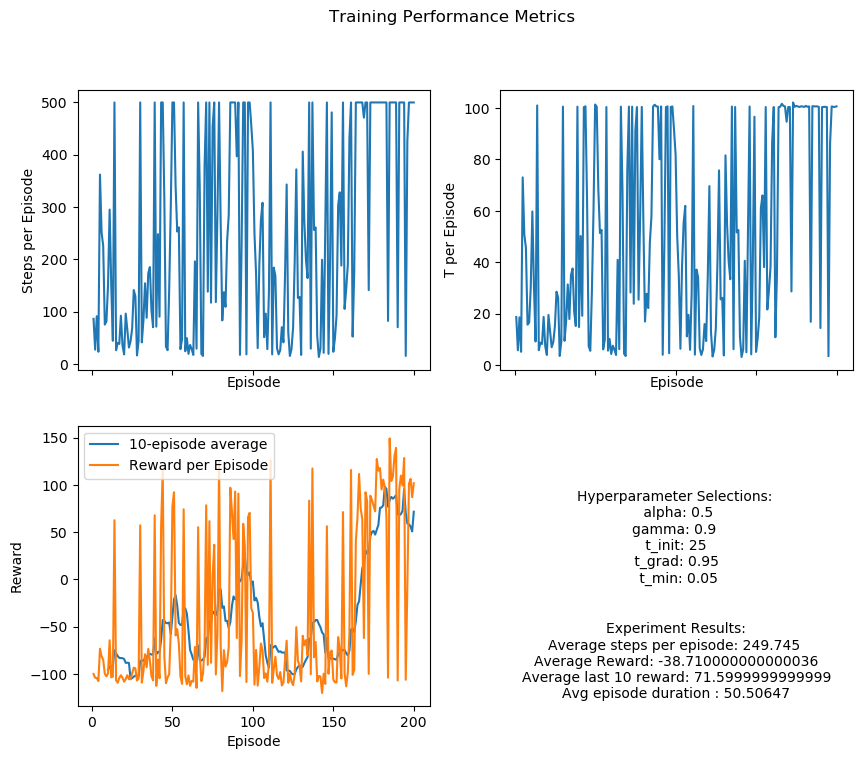

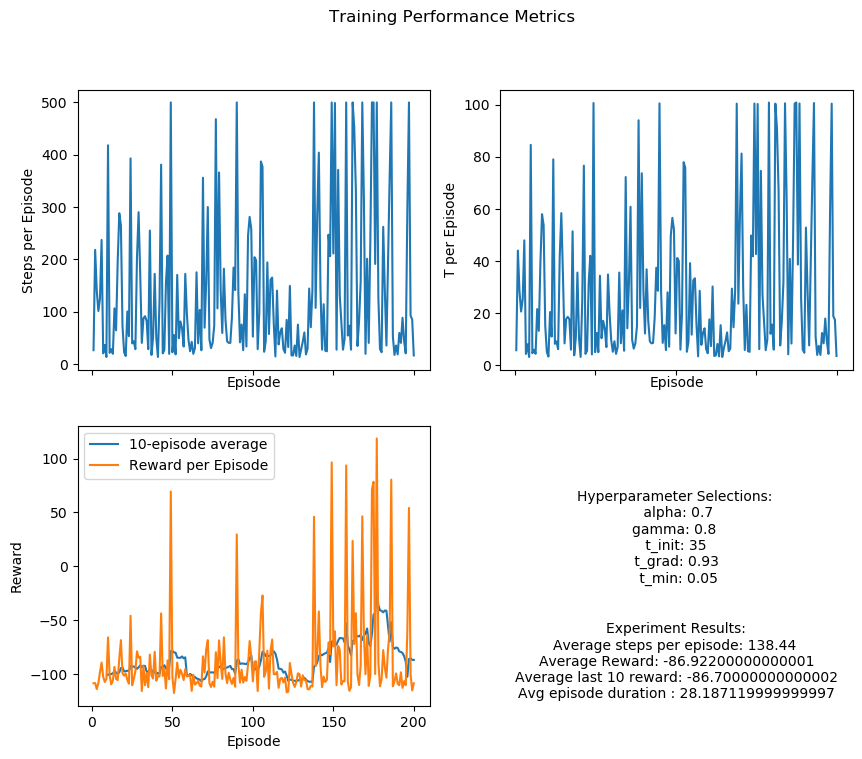

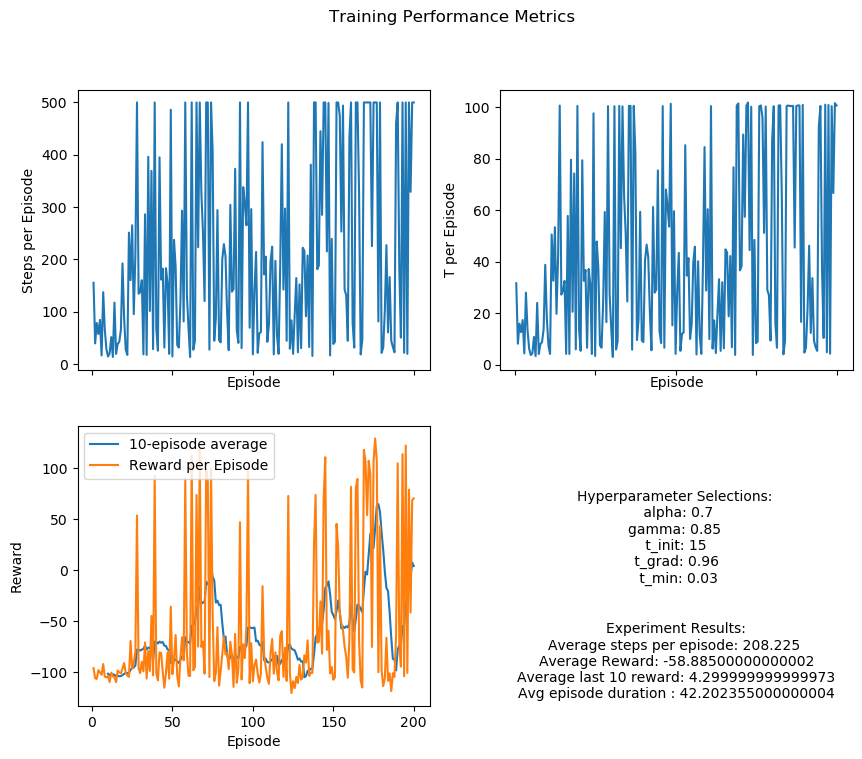

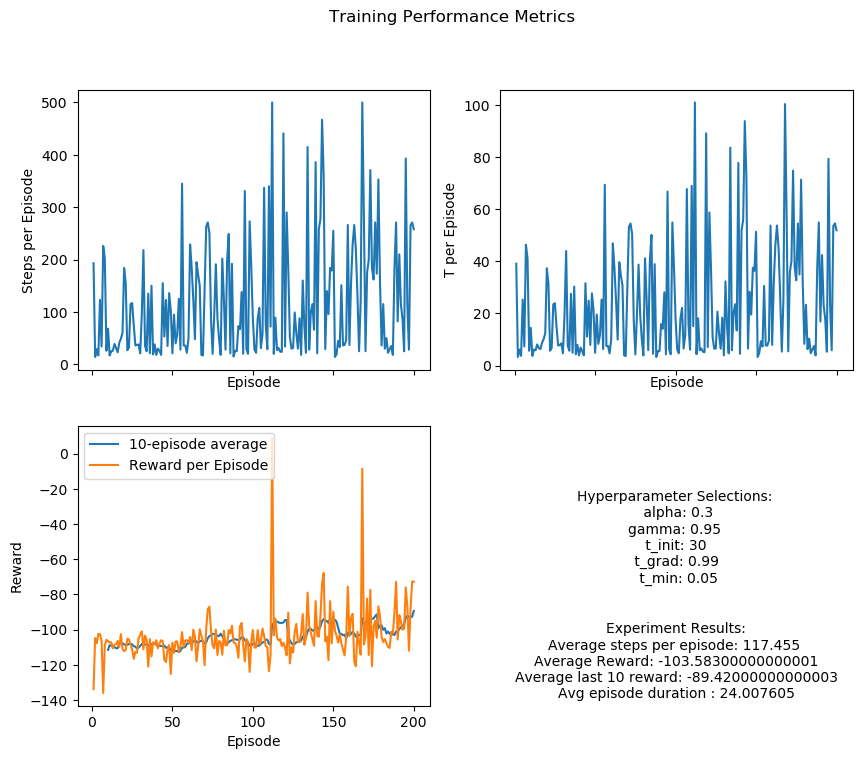

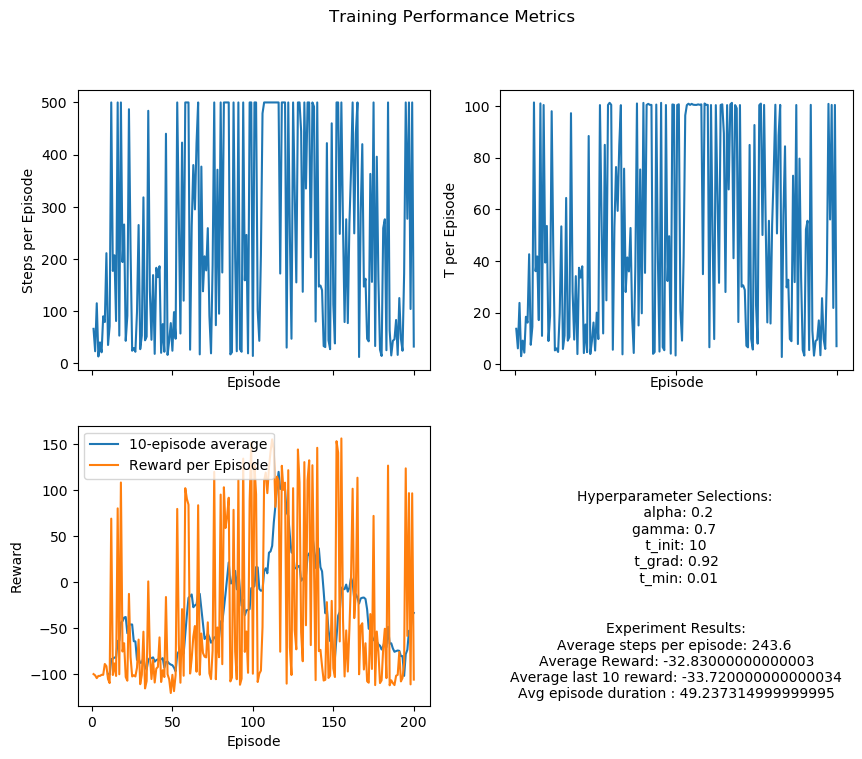

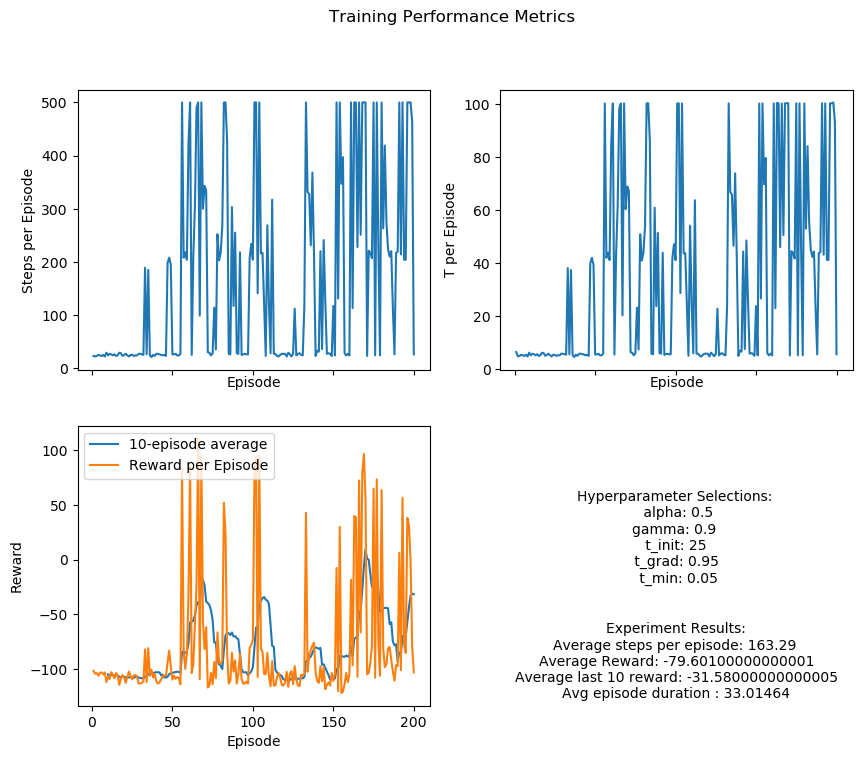

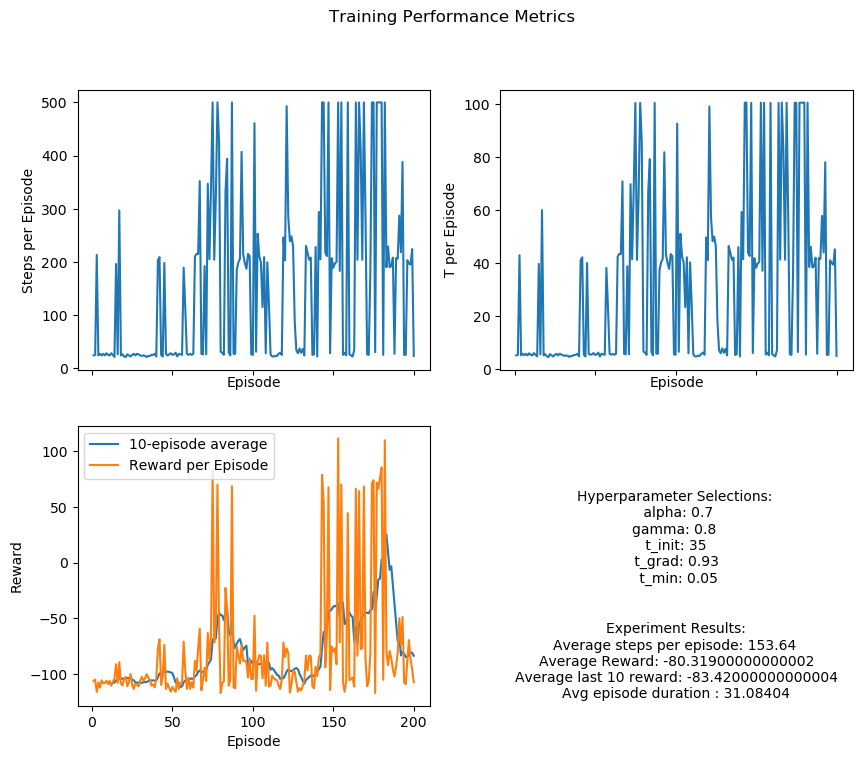

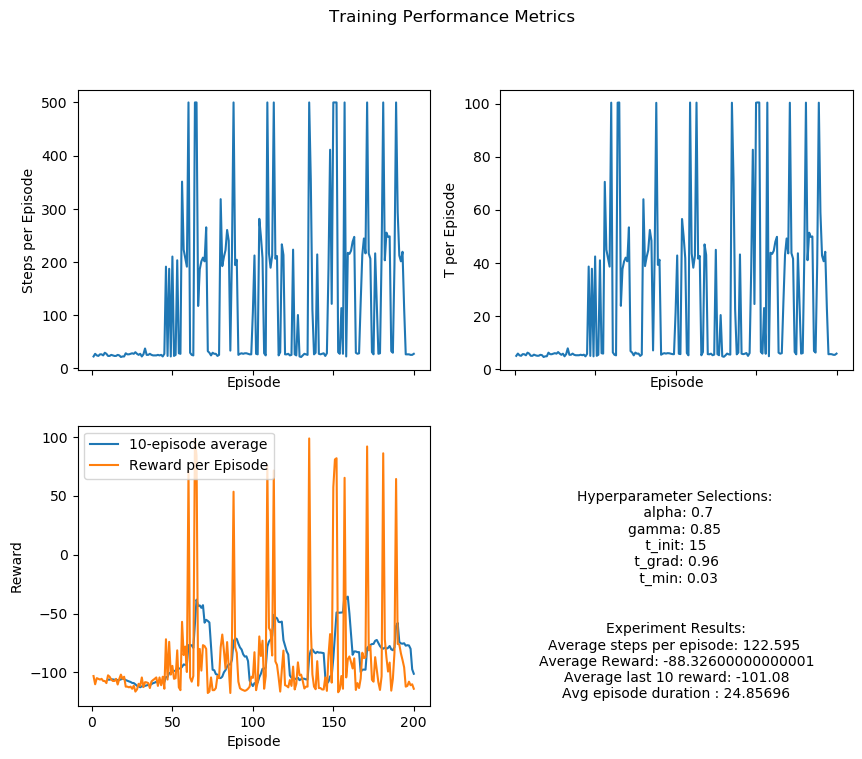

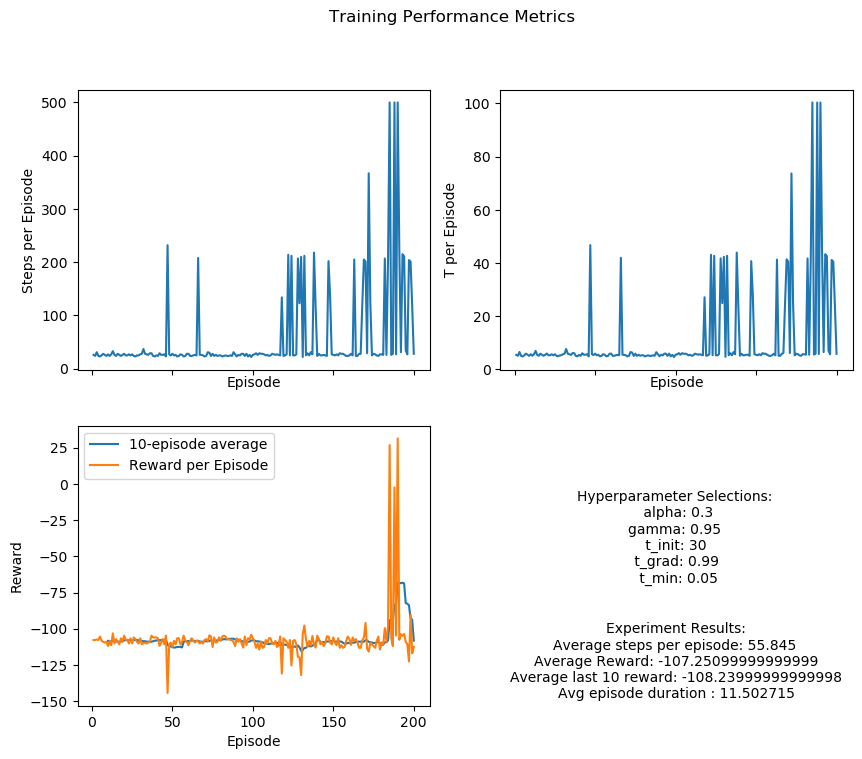

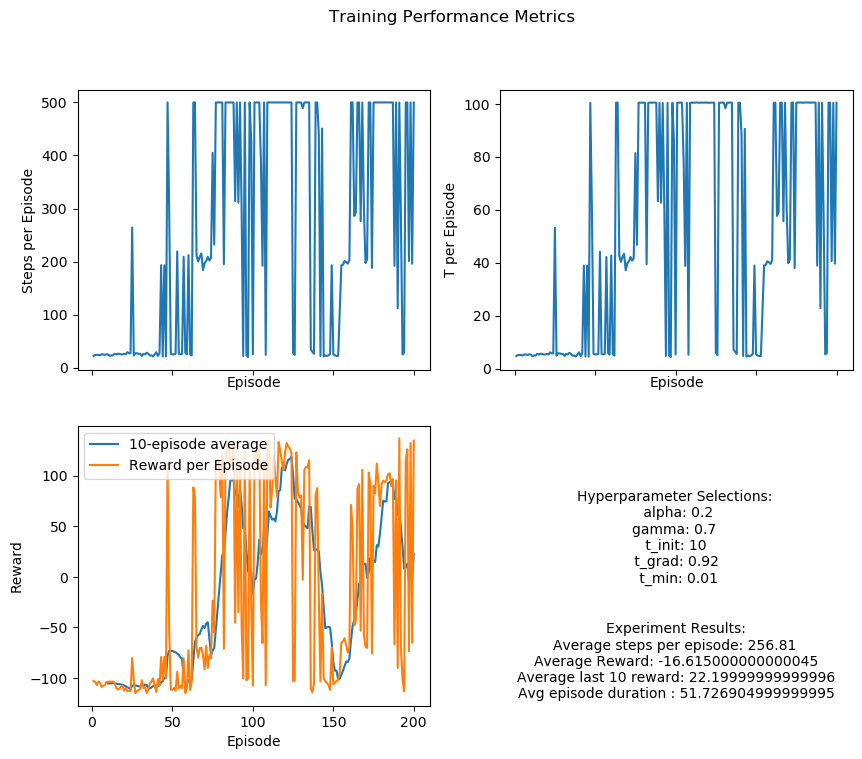

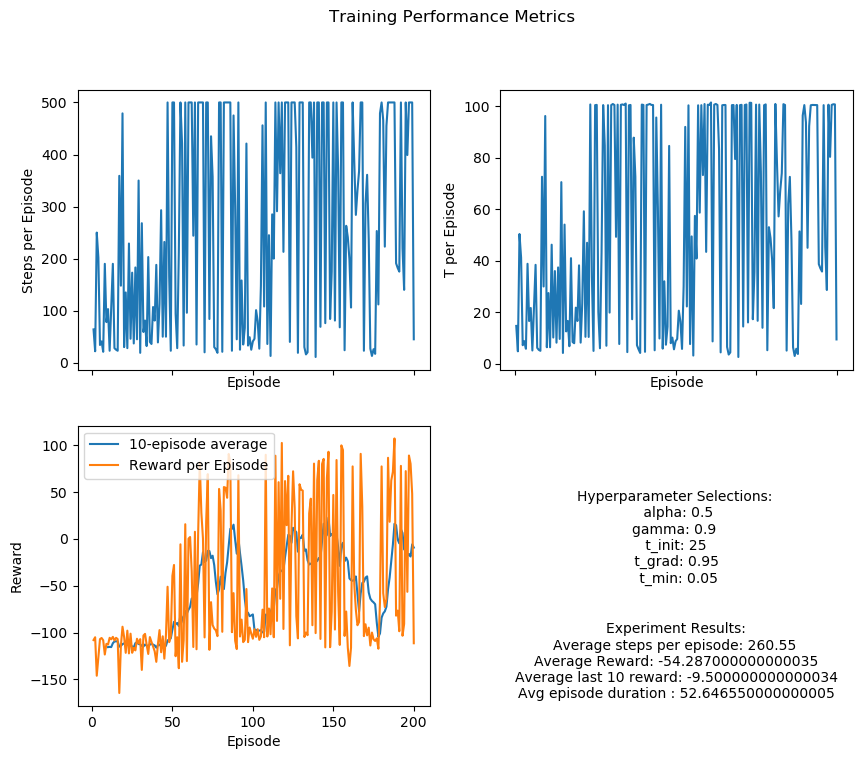

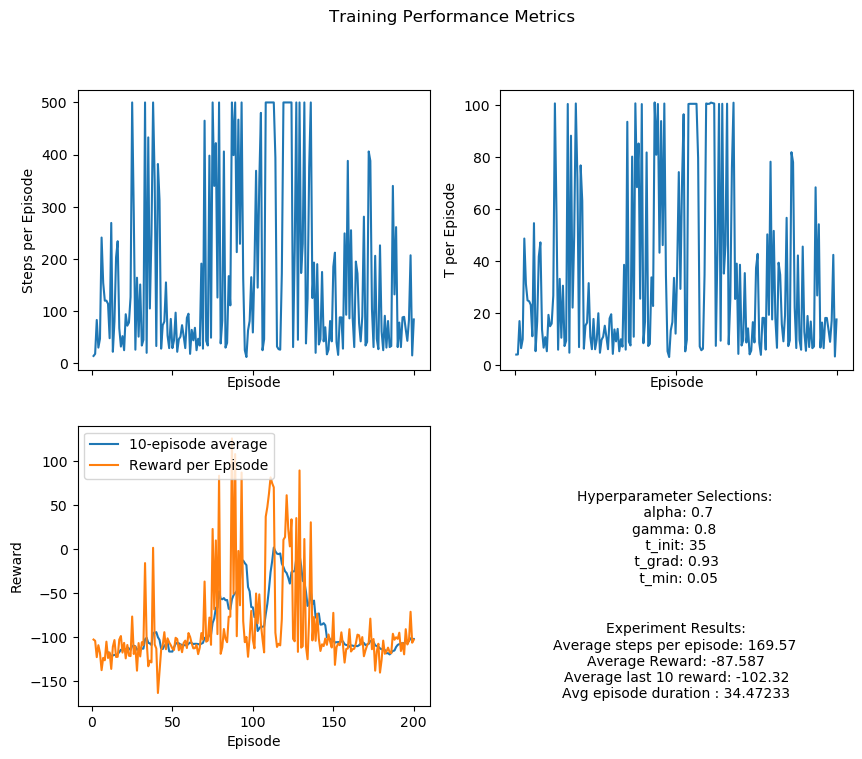

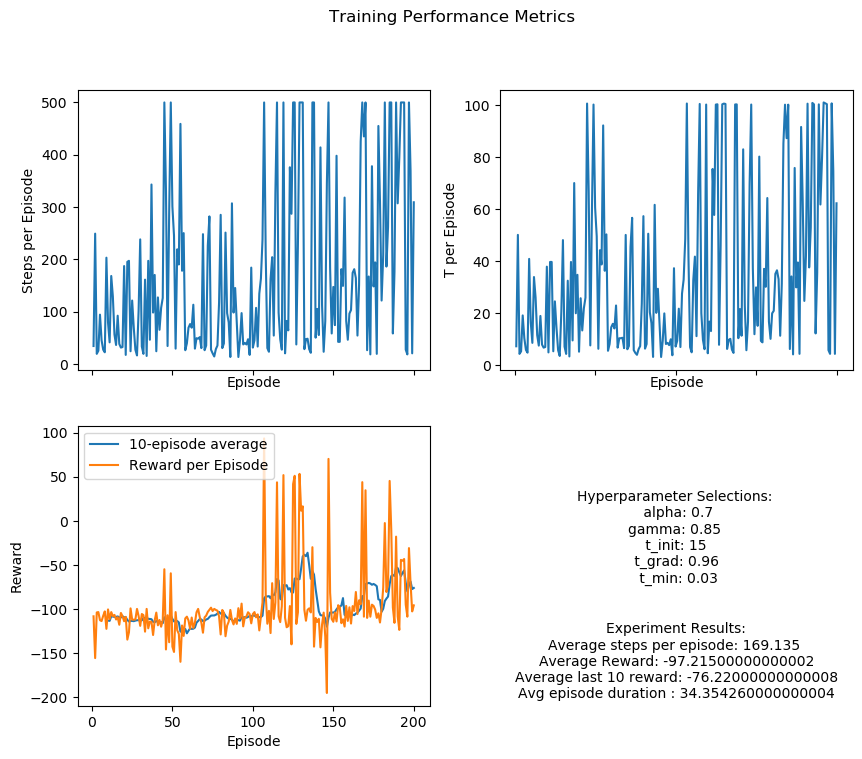

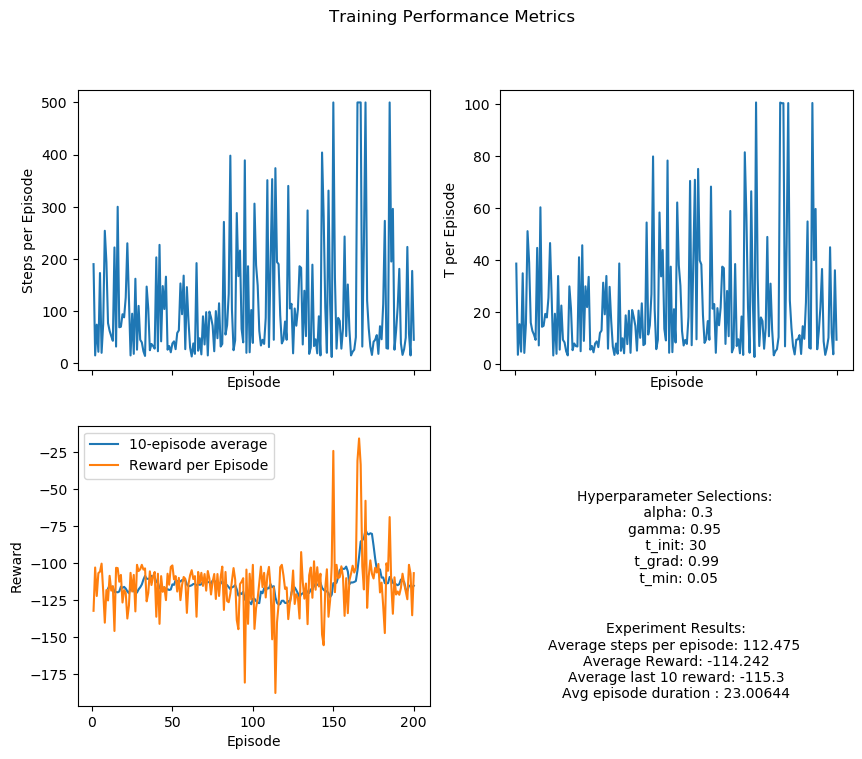

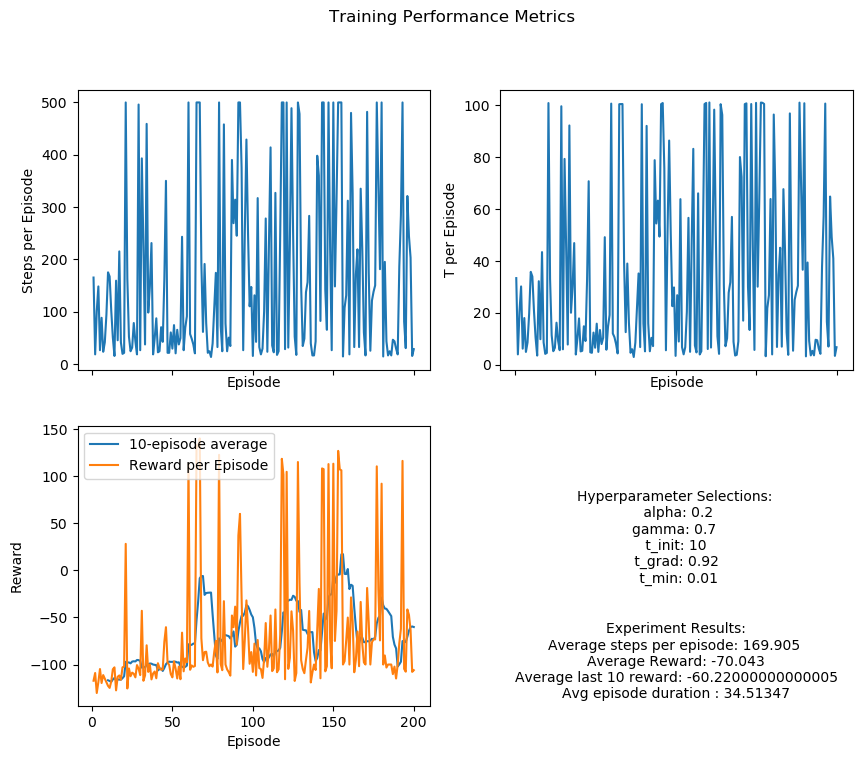

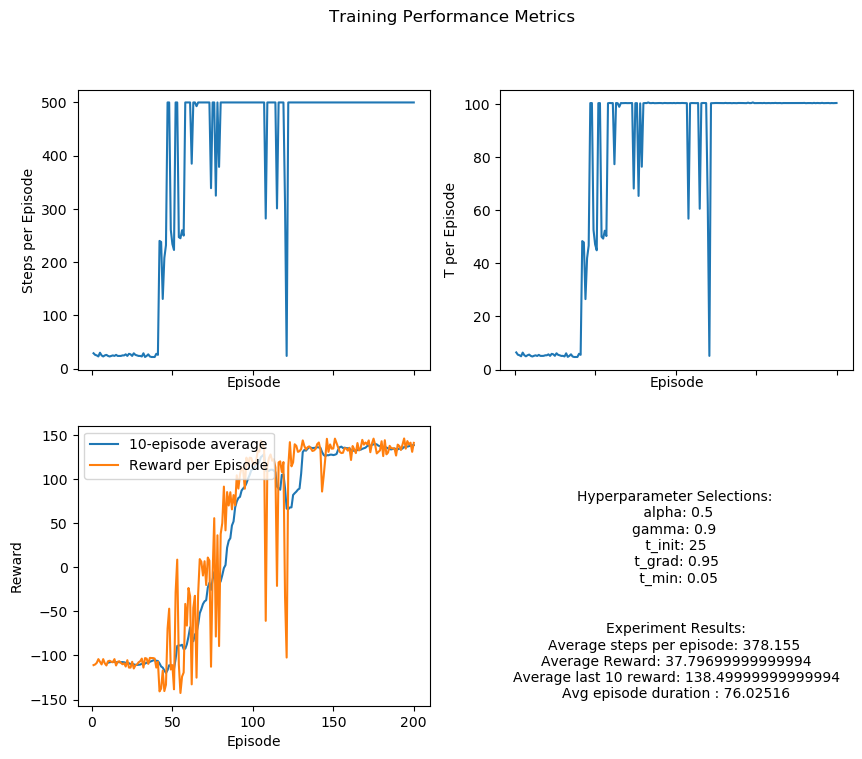

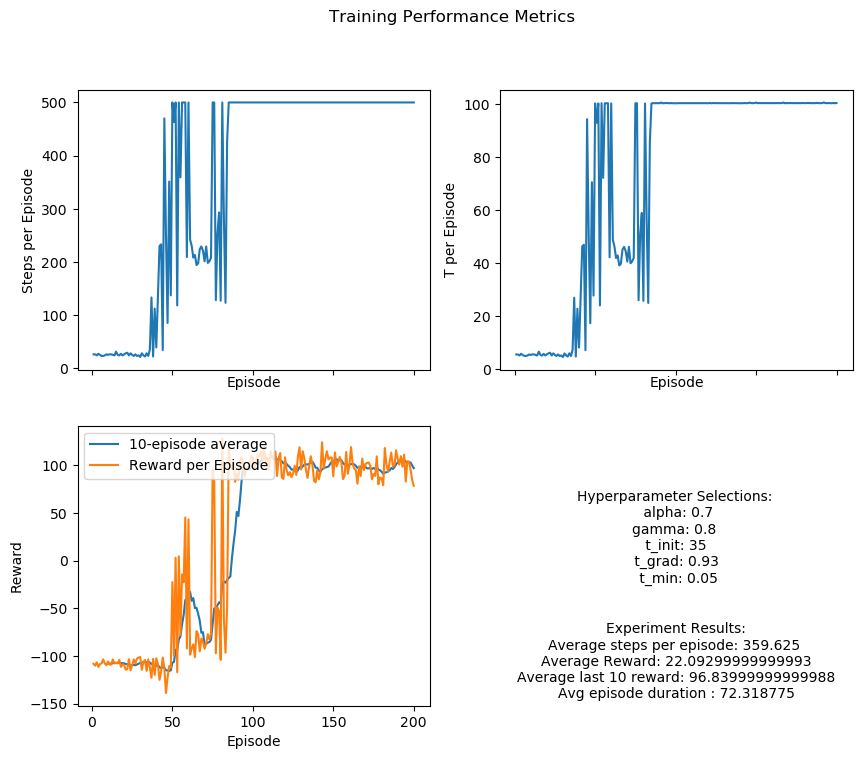

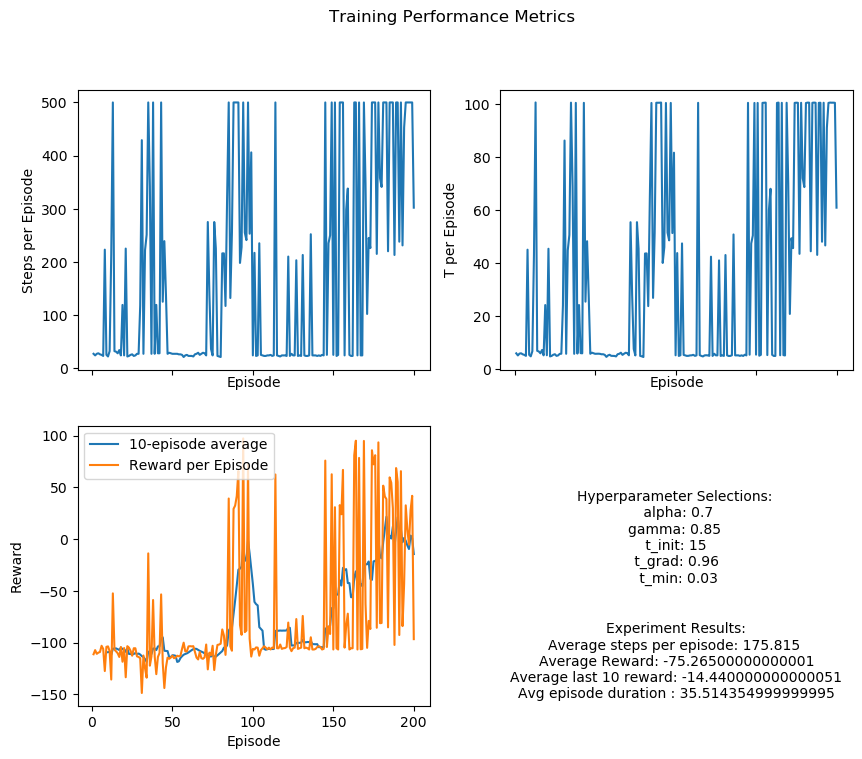

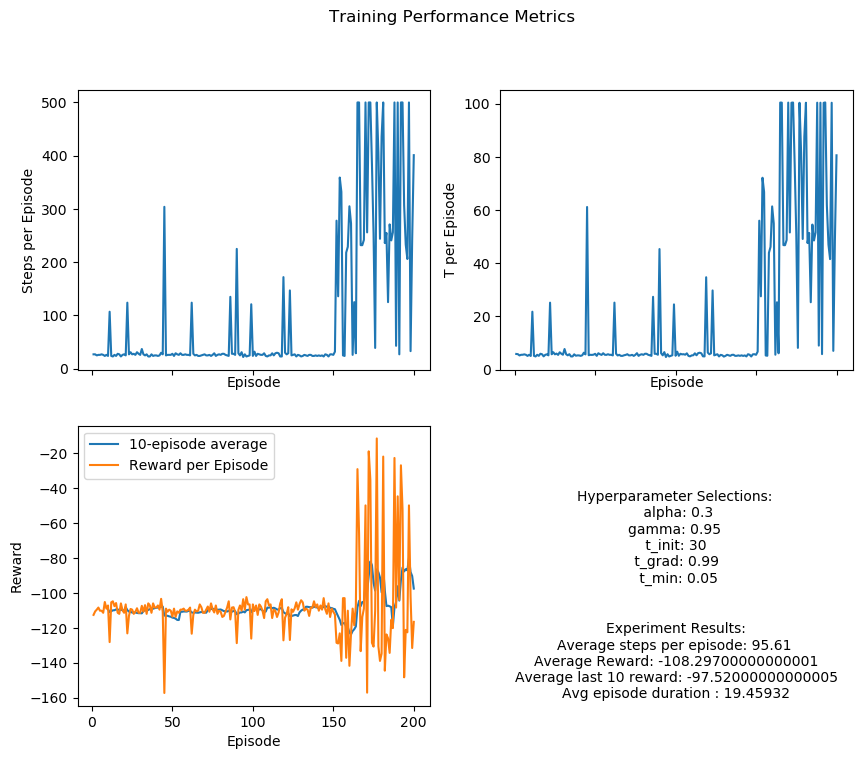

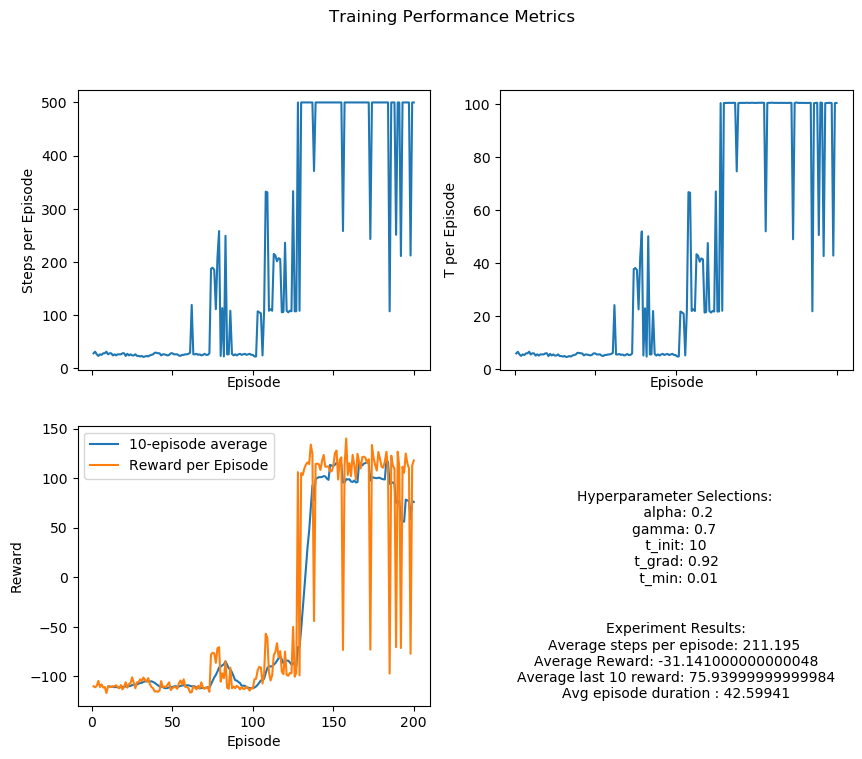

In [164]:
data_path="/home/ozkan/Desktop/rl_ws/src/scripts/Data"
expriment_scenarios = ['Scenario_1_Moderate','Scenario_2_Fast_Learning_High_Exploration','Scenario_3_Fast_Learning_Low_Exploration','Scenario_4_Slow_Learning_High_Exploration','Scenario_5_Slow_Learning_Low_Exploration']
experiment_types = ['epsilongreedy','softmax']
agent_initializations = ['random','constant']

hyperparameter_sets = {
    # Scenario 1: Baseline
    'Scenario_1_Moderate': 

    {'alpha': 0.5, 'gamma': 0.9, 't_init': 25, 't_grad': 0.95, 't_min': 0.05, 
     'epsilon_init': 0.5, 'epsilon_grad': 0.97, 'epsilon_min': 0.05},

    # Scenario 2: Faster Learning, High Exploration
    'Scenario_2_Fast_Learning_High_Exploration': 
    {'alpha': 0.7, 'gamma': 0.8, 't_init': 35, 't_grad': 0.93, 't_min': 0.05,
     'epsilon_init': 0.8, 'epsilon_grad': 0.95, 'epsilon_min': 0.1},

    # Scenario 3: Faster Learning, Low Exploration 
    'Scenario_3_Fast_Learning_Low_Exploration': 
    {'alpha': 0.7, 'gamma': 0.85, 't_init': 15, 't_grad': 0.96, 't_min': 0.03,
     'epsilon_init': 0.4, 'epsilon_grad': 0.98, 'epsilon_min': 0.08},

   # Scenario 4: Slower Learning, High Exploration 
   'Scenario_4_Slow_Learning_High_Exploration': 
    {'alpha': 0.3, 'gamma': 0.95, 't_init': 30, 't_grad': 0.99, 't_min': 0.05,
     'epsilon_init': 0.9, 'epsilon_grad': 0.995, 'epsilon_min': 0.2},

    # Scenario 5: Slow Learning, Low Exploration 
    'Scenario_5_Slow_Learning_Low_Exploration': 
    {'alpha': 0.2, 'gamma': 0.7, 't_init': 10, 't_grad': 0.92, 't_min': 0.01,
     'epsilon_init': 0.4, 'epsilon_grad': 0.98, 'epsilon_min': 0.05},

}

# selection=f"{experiment_types[0]}_{agent_initializations[1]}_start"
# path=f"{data_path}/{selection}"
local_path="/home/ozkan/Desktop/rl_ws/src/scripts/Data"
expriment_scenarios = ['Scenario_1_Moderate','Scenario_2_Fast_Learning_High_Exploration','Scenario_3_Fast_Learning_Low_Exploration','Scenario_4_Slow_Learning_High_Exploration','Scenario_5_Slow_Learning_Low_Exploration']
experiment_types = ['epsilongreedy','softmax']
agent_initializations = ['random','constant']
output_file = 'training_results.csv'
final_output=pd.DataFrame()
for type in experiment_types:
    for agent in agent_initializations:
        selection=f"{type}_{agent}_start"
        path=f"{local_path}/{selection}"
        print(path)
        for key in hyperparameter_sets:
            res,data_path=combine_csv_files(files=files, path=path,scenario=key, output_file=output_file)
            # print(hyperparameter_sets[key])
            plot_training_metrics(res,data_path,hyperparameter_sets[key])

            experiment_result = {
                'type': type,
                'agent': agent,
                'scenario': key,
                'alpha': hyperparameter_sets[key]['alpha'],
                'gamma': hyperparameter_sets[key]['gamma'],
                't_init': hyperparameter_sets[key]['t_init'],
                't_grad': hyperparameter_sets[key]['t_grad'],
                't_min': hyperparameter_sets[key]['t_min'],
                'epsilon_init': hyperparameter_sets[key]['epsilon_init'],
                'epsilon_grad': hyperparameter_sets[key]['epsilon_grad'],
                'epsilon_min': hyperparameter_sets[key]['epsilon_min'],
                'avg_steps': res['steps_per_episode'].mean(),
                'avg_reward': res['reward_per_episode'].mean(),
                'avg_last_10_reward': res['reward_per_episode'][-10:].mean(),
                'avg_episode_time': res['t_per_episode'].mean()

            }

            experiment_result = pd.DataFrame([experiment_result])
            final_output=pd.concat([final_output,experiment_result],axis=0)
final_output.to_csv(f'{local_path}/final_output.csv', index=False)

# for key in hyperparameter_sets:
#     res,data_path=combine_csv_files(files=files, path=path,scenario=key, output_file=output_file)
#     print(hyperparameter_sets[key])
#     plot_training_metrics(res,data_path,hyperparameter_sets[key])

In [136]:
res


steps_per_episode  t_per_episode  reward_per_episode  \
episode                                                         
1                     23.0          6.359              -101.6   
2                     22.0          4.760              -104.2   
3                     23.0          4.890              -103.6   
4                     25.0          5.332              -106.0   
5                     24.0          5.156              -103.4   
...                    ...            ...                 ...   
196                  500.0        100.327                38.2   
197                  500.0        100.427                31.6   
198                  500.0        100.707                -1.2   
199                  464.0         93.258               -80.2   
200                   26.0          5.526              -103.0   

         reward_avg_per_episode  reward_min_per_episode  \
episode                                                   
1                     -4.618182                  -100.0   
2                     -4.961905                  -100.0   
3                     -4.709091                  -100.0   
4                     -4.416667                  -100.0   
5                     -4.495652                  -100.0   
...                         ...                     ...   
196                    0.076553                    -0.6   
197                    0.063327                    -0.6   
198                   -0.002405                    -0.6   
199                   -0.173218                  -100.0   
200                   -4.120000                  -100.0   

         reward_max_per_episode  
episode                          
1                           0.8  
2                           0.0  
3                           0.0  
4                           0.0  
5                           0.2  
...                         ...  
196                         0.8  
197                         0.8  
198                         0.8  
199                         0.8  
200                         0.0  

[200 rows x 6 columns]

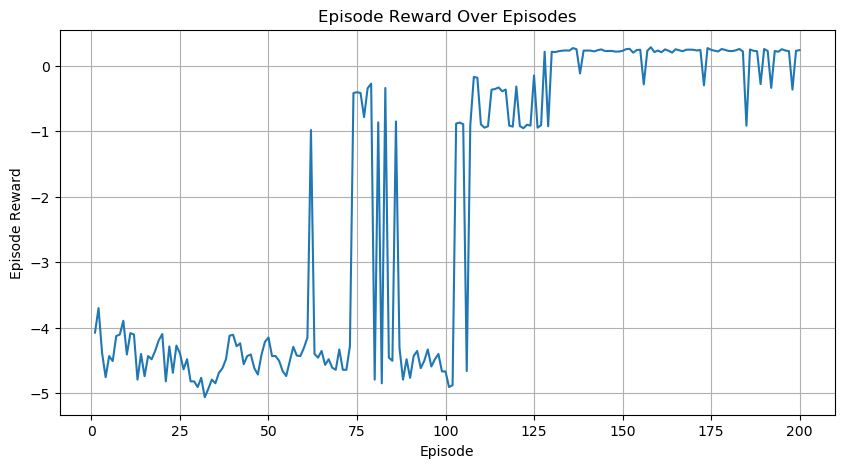

In [68]:


res=pd.DataFrame(res)
# Plotting the graph
plt.figure(figsize=(10, 5))
plt.plot(res['reward_avg_per_episode'])
plt.title('Episode Reward Over Episodes')
plt.xlabel('Episode')
plt.ylabel('Episode Reward')
plt.grid(True)
# plt.xticks(res['Episode'])
plt.show()

In [97]:
    
def plot_training_metrics(res):
    fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(8, 8))

    # Plot each metric on its own subplot
    axes[0][0].plot(res['steps_per_episode'])
    axes[0][0].set_ylabel('Steps per Episode')

    axes[0][1].plot(res['t_per_episode'])
    axes[0][1].set_ylabel('T per Episode')

    axes[2].plot(res['reward_per_episode'])
    axes[2].set_ylabel('Reward per Episode')
    # axes[2].set_xlabel('Episode')

    res['reward_avg'] = res['reward_per_episode'].rolling(10).mean()  # Calculate 10-episode average
    axes[3].plot(res['reward_avg'])
    axes[3].set_ylabel('Avg. Reward per 10 episodes)')
    # axes[3].set_xlabel('Episode')

    # Add alpha and gamma as text
    axes[4].text(0.95, 0.05, f'alpha: 0.5\ngamma: 0.9', 
                 ha='right', va='bottom', transform=axes[4].transAxes)

    # Customize the layout and labels
    fig.suptitle('Training Performance Metrics')
    fig.tight_layout()
    # fig.savefig('performance_plot.png')
    plt.show()

In [128]:
def plot_training_metrics(res,data_path,dict):
    fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(10, 8)) # Adjusted figsize
    axes[0, 0].plot(res['steps_per_episode'])
    axes[0, 0].set_ylabel('Steps per Episode')
    axes[0, 0].set_xlabel('Episode')  # Added x-axis label

    axes[0, 1].plot(res['t_per_episode'])
    axes[0, 1].set_ylabel('T per Episode')
    axes[0, 1].set_xlabel('Episode')  # Added x-axis label




    res['reward_avg'] = res['reward_per_episode'].rolling(10).mean() 
    axes[1, 0].plot(res['reward_avg'], label='10-episode average')  # Added label
    axes[1, 0].plot(res['reward_per_episode'], label='Reward per Episode')  # Added label
    axes[1, 0].legend(loc='upper left') 
    axes[1, 0].set_ylabel('Reward')
    axes[1, 0].set_xlabel('Episode')  # Added x-axis label

    # Alpha and gamma text
    axes[1, 1].axis('off')  # Turn off the empty subplot
    # axes[1, 1].text(0.95, 0.05, f'alpha: {dict['alpha']}\ngamma: {dict['gamma']}', 
    #              ha='right', va='bottom', transform=axes[1, 1].transAxes)
    text_t=f'Hyperparameter Selections: \n alpha: {dict['alpha']}\ngamma: {dict['gamma']} \n t_init: {dict['t_init']} \n t_grad: {dict['t_grad']} \n t_min: {dict['t_min']}'
    text_eps=f'Hyperparameter Selections: \n alpha: {dict['alpha']}\ngamma: {dict['gamma']} \n epsilon_init: {dict['epsilon_init']} \n epsilon_grad: {dict['epsilon_grad']} \n epsilon_min: {dict['epsilon_min']}'
    
    axes[1, 1].text(0.5, 0.5, text_t, 
                 ha='center', va='center', transform=axes[1, 1].transAxes)
    
    fig.suptitle('Training Performance Metrics')
    fig.savefig(f'{data_path}/training_results.png')




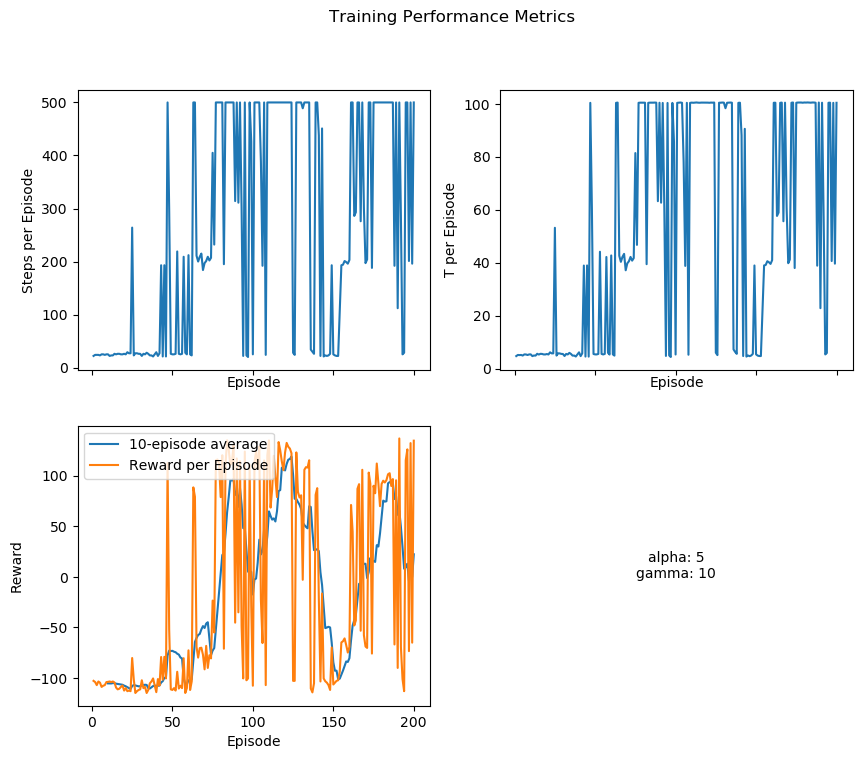

In [129]:
plot_training_metrics(res)